# Decision Tree Classifier 

https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve


## 2. Data 

In [2]:
data=pd.read_csv("breast_cancer.data" , header=None)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
col_names=["Sample code number", "Clump Thickness", 
                            "Uniformity of Cell Size", "Uniformity of Cell Shape", 
                           
           "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei" ,
                            "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]

In [5]:
col_names

['Sample code number',
 'Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses',
 'Class']

In [6]:
data.columns=col_names

In [7]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


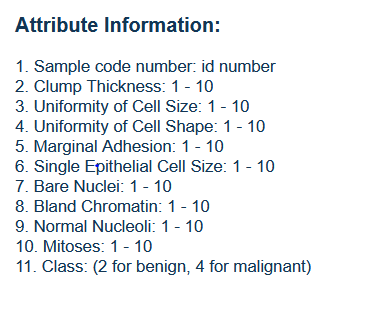

In [8]:
data.shape

(699, 11)

## 3. Handling Missing / Incorrect Data 

In [9]:
data.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [10]:
data.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [11]:
data['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [12]:
data['Class'].value_counts(normalize=True)

2    0.655222
4    0.344778
Name: Class, dtype: float64

In [13]:
#delete the missing value
data=data.replace(to_replace="?", value=np.nan)
data=data.dropna()
pd.DataFrame.count(data)

Sample code number             683
Clump Thickness                683
Uniformity of Cell Size        683
Uniformity of Cell Shape       683
Marginal Adhesion              683
Single Epithelial Cell Size    683
Bare Nuclei                    683
Bland Chromatin                683
Normal Nucleoli                683
Mitoses                        683
Class                          683
dtype: int64

In [14]:
del data['Sample code number']

## 4. Train / Test Split

In [15]:
data['Class'].replace(to_replace=2, value=0, inplace=True)
data['Class'].replace(to_replace=4,value=1, inplace=True)
y=data['Class']
del data['Class']
X=data.copy()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)

In [17]:
X

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


## 5. Fitting Decision Tree 

In [18]:
clf=DecisionTreeClassifier(criterion="entropy", max_depth=6)
clf.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6)

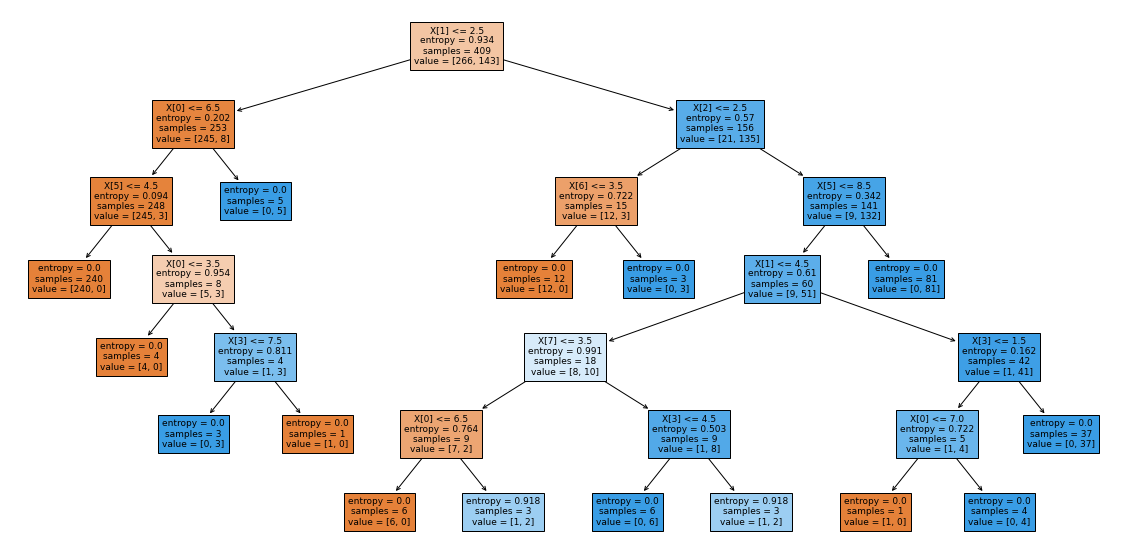

In [19]:
plt.figure(figsize=(20,10))
plot_tree(clf,fontsize=9,filled=True)
plt.show()

In [20]:
prediction_test=clf.predict(X_test) 

## 6. Performance Evaluation 

In [21]:
def classification_report(model):
    prediction_test = model.predict(X_test)
    # Print the prediction accuracy
    accuracy = metrics.accuracy_score(y_test, prediction_test)
    confusion_matrix = metrics.confusion_matrix(y_test, prediction_test)
    classification = metrics.classification_report(y_test, prediction_test)

    print('============================== Model Evaluation ==============================')
    print('Classifier :',model)
    print("\n Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
   

In [22]:
classification_report(clf)

============================== Model Evaluation ==============================
Classifier : DecisionTreeClassifier(criterion='entropy', max_depth=6)

 Model Accuracy:
 0.9416058394160584

Confusion matrix:
 [[167  11]
 [  5  91]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       178
           1       0.89      0.95      0.92        96

    accuracy                           0.94       274
   macro avg       0.93      0.94      0.94       274
weighted avg       0.94      0.94      0.94       274



In [23]:
class_names=[1,0]
def plot_conf_matrix(y_test, prediction_test, class_names):
    cnf_matrix = metrics.confusion_matrix(y_test, prediction_test)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

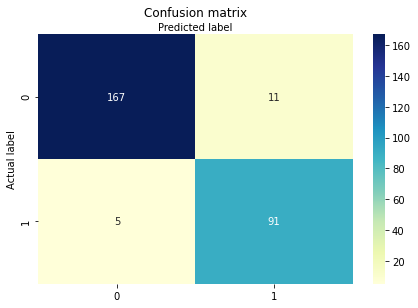

In [24]:
plot_conf_matrix(y_test, prediction_test, class_names)

In [25]:
class_names

[1, 0]

In [26]:
def plot_roc(model,X_test,y_test):
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test,prediction_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label='NB')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title("Decision Tree ROC curve")
    print("Area Under the Curve=",format(roc_auc,"0.3f"))
    plt.show()

Area Under the Curve= 0.943


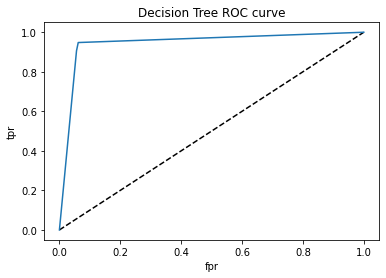

In [27]:
plot_roc(clf,X_test,y_test)

< END>